Adapted from tutorials at pytorch.org

In [8]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim

<h3> Data loading </h3>

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

In [4]:
%matplotlib inline

<h3> Define network </h3>

In [49]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2))
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, (2, 2))
        x = x.view(-1, self.num_flat_features(x))
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        x = self.fc3(x)
        return x

    def num_flat_features(self, x):
        size = x.size()[1:]  # all dimensions except the batch dimension
        num_features = 1
        for s in size:
            num_features *= s
        return num_features

In [6]:
net = Net()

In [7]:
net

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

<h3> Define loss and learning rule </h3>

In [10]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

<h3> Training </h3>

In [12]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward 
        outputs = net(inputs)
        
        # Calculate loss 
        loss = criterion(outputs, labels)
        
        # Backpropagation 
        loss.backward()
        
        # Learning rule update 
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 1000 == 999:    # print every 1000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 1000))
            running_loss = 0.0

print('Finished Training')

[1,  1000] loss: 1.916
[1,  2000] loss: 1.765
[1,  3000] loss: 1.705
[1,  4000] loss: 1.651
[1,  5000] loss: 1.616
[1,  6000] loss: 1.566
[1,  7000] loss: 1.561
[1,  8000] loss: 1.510
[1,  9000] loss: 1.487
[1, 10000] loss: 1.484
[1, 11000] loss: 1.455
[1, 12000] loss: 1.417
[2,  1000] loss: 1.360
[2,  2000] loss: 1.355
[2,  3000] loss: 1.327
[2,  4000] loss: 1.356
[2,  5000] loss: 1.301
[2,  6000] loss: 1.310
[2,  7000] loss: 1.293
[2,  8000] loss: 1.293
[2,  9000] loss: 1.296
[2, 10000] loss: 1.255
[2, 11000] loss: 1.264
[2, 12000] loss: 1.266
Finished Training


<h3> Evaluation </h3>

In [13]:
dataiter = iter(testloader)
images, labels = dataiter.next()


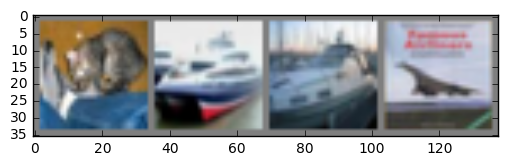

In [14]:
imshow(torchvision.utils.make_grid(images))

In [15]:
%matplotlib inline 

In [16]:
labels

tensor([ 3,  8,  8,  0])

In [17]:
output = net(images)

In [18]:
output

tensor([[-0.8710, -0.9211,  0.5718,  1.6469,  0.7467,  0.9546,  0.4832,
         -0.2425, -1.0657, -0.8620],
        [ 4.5516,  6.6529, -1.6684, -1.7333, -4.0701, -4.9548, -3.7885,
         -4.9120,  6.8348,  3.7834],
        [ 1.4411,  3.3441, -0.7426, -1.1734, -1.6670, -1.6830, -2.1650,
         -1.4455,  2.8334,  1.9109],
        [ 3.5701,  2.5817, -0.4750, -1.7329, -0.7938, -3.4097, -2.1578,
         -3.2498,  3.7924,  1.3184]])

In [19]:
_, preds = torch.max(output, 1)

In [20]:
preds

tensor([ 3,  8,  1,  8])

In [21]:
(labels==preds).sum().item()

2

In [22]:
with torch.no_grad():
    correct_examples = 0
    total_examples = 0
    for i, data in enumerate(testloader, 0):
        images, labels = data
        output = net(images)
        _, preds = torch.max(output, 1)
        corr = (labels==preds).sum().item()
        correct_examples+=corr 
        total_examples += 4

In [23]:
correct_examples/total_examples

0.553

<b> Accuracy per class </b>

In [36]:
class_correct = list(0 for i in range(10))
class_total = list(0 for i in range(10))

In [37]:
class_correct

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [38]:
dataiter = iter(testloader)
images, labels = dataiter.next()

In [39]:
outputs = net(images)

In [40]:
_, predicted = torch.max(outputs, 1)

In [41]:
predicted

tensor([ 3,  8,  1,  8])

In [42]:
labels

tensor([ 3,  8,  8,  0])

In [43]:
predicted==labels

tensor([ 1,  1,  0,  0], dtype=torch.uint8)

In [44]:
(predicted==labels).sum()

tensor(2)

In [45]:
(predicted==labels)[0]

tensor(1, dtype=torch.uint8)

Convert 1-tensor to Python scalar

In [46]:
(predicted==labels)[0].item()

1

In [48]:
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


print("Accuracies: ")
for i in range(10):
    print('Class' , classes[i] , ' : ', 100 * class_correct[i] / class_total[i])

Accuracies: 
Class plane  :  49.6
Class car  :  83.9
Class bird  :  47.2
Class cat  :  22.5
Class deer  :  52.1
Class dog  :  57.3
Class frog  :  63.0
Class horse  :  56.8
Class ship  :  67.1
Class truck  :  53.5
